

# Simple Linear Regression


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data in


In [5]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head() #show me the first five rows 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Lets select some features to explore more.


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 


In [28]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [29]:
#800 ~ rows training
#200 ~ rows will be for testing

In [30]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [31]:
#var[index]
len(cdf)

1067

In [32]:
msk = np.random.rand(len(cdf)) <= 0.80#<=80% #len 1067 #853
 

In [33]:
msk

array([ True, False,  True, ..., False,  True,  True])

In [34]:
~msk

array([False,  True, False, ...,  True, False, False])

In [35]:
len(msk)

1067

In [36]:
train = cdf[msk] #80% of rows are your trainig example
test = cdf[~msk] #rest of the data out of the mask are for testing data #~not

In [37]:
train.shape #(nrows,ncols)

(851, 4)

In [38]:
test.shape

(216, 4)

In [39]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
...,...,...,...,...
1060,3.0,6,11.5,264
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1065,3.2,6,11.3,260


In [40]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
7,3.7,6,11.1,255
8,3.7,6,11.6,267
11,3.5,6,10.4,239
13,5.9,12,15.6,359
...,...,...,...,...
1031,2.5,5,9.4,216
1042,1.4,4,5.4,124
1059,3.2,6,10.2,235
1061,3.2,6,11.2,258


In [41]:
test.shape

(216, 4)

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


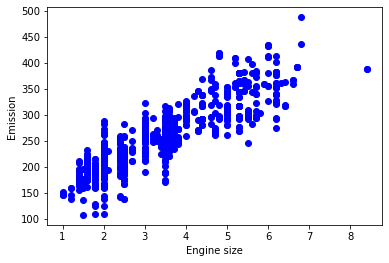

In [42]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [25]:
train['ENGINESIZE']

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1060    3.0
1061    3.2
1062    3.0
1063    3.2
1064    3.0
Name: ENGINESIZE, Length: 834, dtype: float64

In [27]:
np.asanyarray(train[['ENGINESIZE']])

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [2. ],
       [3. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [6. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
      

In [28]:
np.asanyarray(train[['CO2EMISSIONS']])

array([[196],
       [221],
       [136],
       [255],
       [244],
       [230],
       [232],
       [255],
       [267],
       [212],
       [239],
       [359],
       [359],
       [338],
       [354],
       [338],
       [354],
       [359],
       [202],
       [230],
       [214],
       [230],
       [214],
       [235],
       [251],
       [224],
       [258],
       [224],
       [258],
       [260],
       [227],
       [258],
       [288],
       [230],
       [239],
       [258],
       [212],
       [246],
       [304],
       [294],
       [336],
       [407],
       [354],
       [336],
       [407],
       [354],
       [409],
       [308],
       [262],
       [285],
       [285],
       [267],
       [281],
       [281],
       [292],
       [209],
       [209],
       [237],
       [297],
       [356],
       [320],
       [380],
       [380],
       [437],
       [193],
       [202],
       [181],
       [193],
       [200],
       [209],
       [209],
      

In [29]:
X = np.asanyarray(train[['ENGINESIZE']])

In [30]:
y = np.asanyarray(train[['CO2EMISSIONS']])

In [36]:
from sklearn import linear_model

#y = mx + c == y is dependent var, x is the data(indep. var) m is COEFFICIENT  and c is INTERCEPT

In [37]:
regr = linear_model.LinearRegression() #created an object of linear regression


In [38]:
#[1,1.0,2,3.3,4,11.9] asanyarray
#[11,22,33,44,55] asarray,array

In [39]:
regr

LinearRegression()

In [42]:
train.shape
test.shape

(225, 4)

In [40]:
train_x = np.asanyarray(train[['ENGINESIZE']]) #x represents independent variables 
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #y represent dependent variable 

In [43]:
regr

LinearRegression()

In [44]:
#regr.fit(independentvariable,dependentvariable)
regr.fit(train_x, train_y)


LinearRegression()

In [45]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.99391771]]
Intercept:  [125.73342582]


In [65]:
regr.coef_

array([[38.71715806]])

In [66]:
regr.intercept_

array([126.59879588])

# regr.coef_[row][col]

In [46]:
regr.coef_[0][0]

38.993917712562684

In [49]:
regr.intercept_

array([125.73342582])

In [48]:
regr.intercept_[0]

125.73342581676386

As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

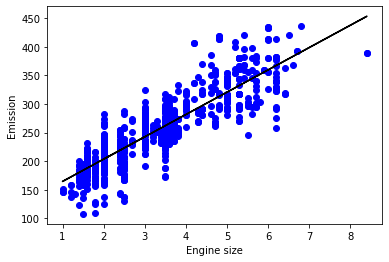

In [52]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'black') #y = mx+c
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```


In [54]:
test_x = np.asanyarray(test[['ENGINESIZE']]) #question in exam Questions
test_y = np.asanyarray(test[['CO2EMISSIONS']])#(ACTUAL answers)

In [57]:
predicted_y = regr.predict(test_x) #whatever answerr will be generated will be stored in predicted_y predicted


In [77]:
test_y.shape

(225, 1)

In [78]:
predicted_y.shape

(225, 1)

In [58]:
from sklearn.metrics import r2_score 

In [61]:
print(f"Mean absolute error: {np.mean(np.absolute(predicted_y - test_y))} ")#pred - actual
 

Mean absolute error: 23.097138018778853 


In [60]:
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) **2))


Residual sum of squares (MSE): 914.06


In [62]:
from sklearn.metrics import r2_score 
print(f"R2-score:{r2_score(test_y , predicted_y)}") #most accurate thing or evaluation metrics

R2-score:0.7799123903550543


In [63]:
#7.6 --> engine
regr.predict([[7.6]])

array([[422.08720043]])

In [64]:
#0.8 --> engine
regr.predict([[0.8]])

array([[156.92855999]])